<center> <h1> [SI4C-L1] 4MEO/MIN INSTRUMENTATION </h1> 
 <br> <h2> Computer session 3 : Error measurement, statistical and frequency analysis
    
    warm up
 </h2> </center>

#### First name:

<span>

#### Last name :

<span>

#### Noma :

# First things first 

In this first computer session, we will use Python and Jupyter Notebook. The "cheatsheet" is made available in the computer session materials and the idea is to provide a quick reference for switching from matlab to python.

<ul>
  <li>Tutorial for windows users: https://coessing.files.wordpress.com/2019/08/jupyternotebook_tutorial_bypaige.pdf
</li>
  <li>Tutorial for Mac and Linux users : https://www.dataquest.io/blog/jupyter-notebook-tutorial/
</li>
  <li>About Python programming : https://www.learnpython.org/en/Welcome -> https://realpython.com/python-first-steps/ 
</li>
</ul>  

For theorical questions please refere to : Lectures I, II and III of the Instrumentation courses.


## Part I : measurement errors

### EXO A : Linearity error

Given a varing input $x$ and the corresponding instrument outputs $y$, we want to analyse the instrument characteristics in the aim of evaluating the need of calibration.

In [4]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

pl.rcParams['figure.figsize'] = 10, 8 
pl.rcParams['font.size'] = 18

x = np.r_[np.linspace(20,220,10), np.linspace(180,0,9)]
y = np.array([20,40,59,77,97,117,137,156,175,195,176,156,136,117,97,78,58,39,20])

<b> <p>
1. Print the content of x and y 
2. Plot the curve representing the instrument response.
3. What can you say about the measured values ?</b> </p>

In [5]:
x,y

(array([ 20.        ,  42.22222222,  64.44444444,  86.66666667,
        108.88888889, 131.11111111, 153.33333333, 175.55555556,
        197.77777778, 220.        , 180.        , 157.5       ,
        135.        , 112.5       ,  90.        ,  67.5       ,
         45.        ,  22.5       ,   0.        ]),
 array([ 20,  40,  59,  77,  97, 117, 137, 156, 175, 195, 176, 156, 136,
        117,  97,  78,  58,  39,  20]))

Text(0, 0.5, '$y(x) $')

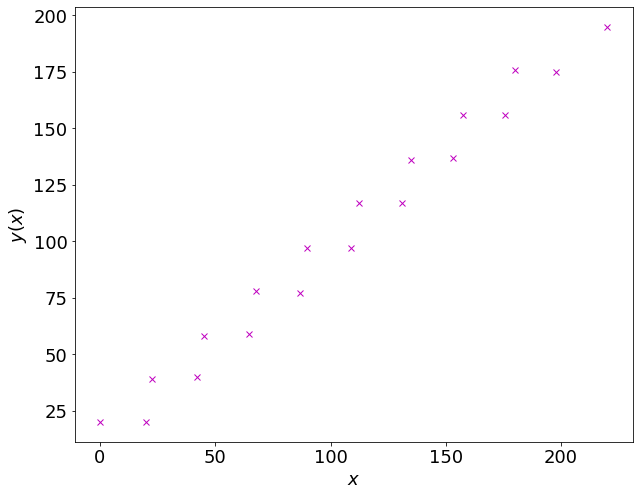

In [6]:
pl.plot(x,y,'mx')
pl.xlabel(r'$x$')
pl.ylabel(r'$y(x) $')

In order to estimate the linearity error, we are going to use curve fitting and try to fit a polynomial to the cloud of points represented in the first figure.
In other words, we are looking for the p coefficient of the polynomial p(x) = p[0] * xn + ... + p[n] * x1 + x0 that make the curve of p fits the curve of y curve.

<b> <p>
4. Based on a first degree fitting polynomial, compute the coefficients of the polynomial functions.
5. Evaluate the polynomial p at the values given by x.
6. Print the measured and the fitting data contents, then plot their curves together in the same graph.
7. What can you say about the results ?
</b> </p>

Hint : See polynomial fitting APIs : numpy.polyfit ( https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html )

In [7]:
# create best fit
p = np.polyfit(x,y,1)
p

array([ 0.8402436 , 13.74265035])

In [8]:
y_fit = np.polyval(p,x)

In [9]:
print (f'measured y = {y}')
print (f'estimated y = {y_fit}')

measured y = [ 20  40  59  77  97 117 137 156 175 195 176 156 136 117  97  78  58  39
  20]
estimated y = [ 30.54752243  49.21960251  67.89168259  86.56376267 105.23584275
 123.90792283 142.58000291 161.25208299 179.92416307 198.59624315
 164.98649901 146.08101792 127.17553684 108.27005576  89.36457468
  70.4590936   51.55361252  32.64813143  13.74265035]


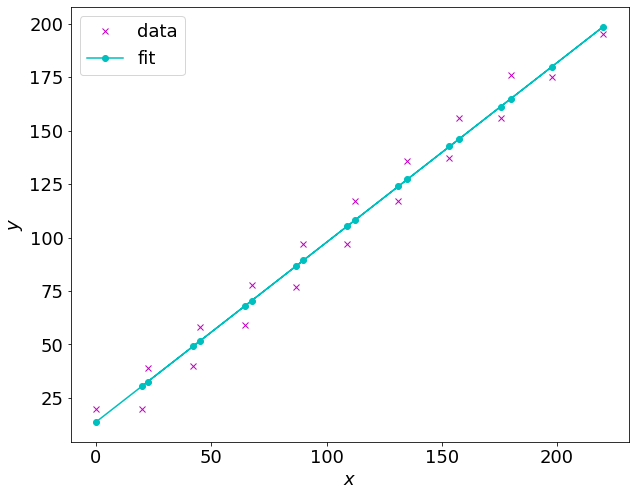

In [10]:
pl.plot(x,y,'mx',x,y_fit,'-co')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.legend(('data','fit'),loc='best')

In [11]:
from IPython.display import Image
Image(url= "linearity formulas.png", width=400, height=400)

The main goal behind the linear fitting is to estimate the linearity error.

Given the formulas below :
<b> <p>
8. Compute linearity error.
9. What is the maximum error and the range of the instrument ?</b> </p>

In [12]:
epsilon_L = abs(y - y_fit)
epsilon_L_max = max(epsilon_L)
r0 = max(y) - min(y)
percent_epsilon_L_max = epsilon_L_max/r0 * 100.

In [13]:
print ('Max error is %4.3f' % epsilon_L_max)
print ('The range is %4.3f' % r0)
print ('Linearity error is %3.2f%s' % (percent_epsilon_L_max, '%'))

Max error is 11.014
The range is 175.000
Linearity error is 6.29%


<b> <p> 10. using errorbar API plot the linearity error </b> </p>

Text(0, 0.5, '$y$')

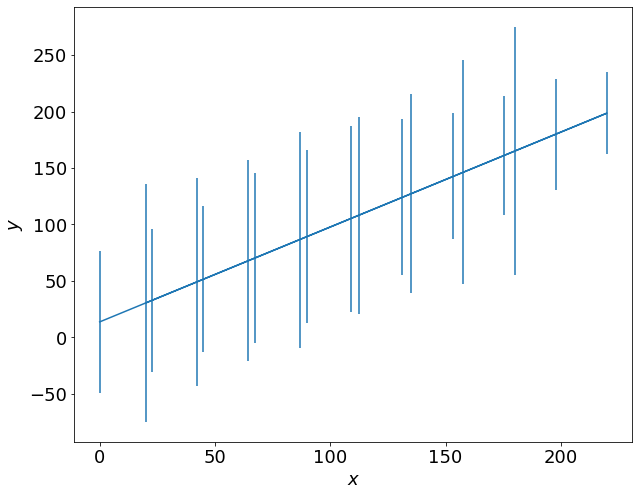

In [11]:
pl.errorbar(x,y_fit,10*epsilon_L)
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')

### EXO B : Hysterisis

In [12]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 6 
mpl.rcParams['font.size'] = 18
from IPython.display import Image 

In [13]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])
y = np.array([0.1, 1.1, 2.1, 3.0, 4.1, 5.0, 5.0, 4.2, 3.2, 2.2, 1.2, 0.2])

<b> <p>1. Plot the calibration curve with the lines connecting points. What do you say about it ?</b> </p>

Text(0, 0.5, '$y$ [mV]')

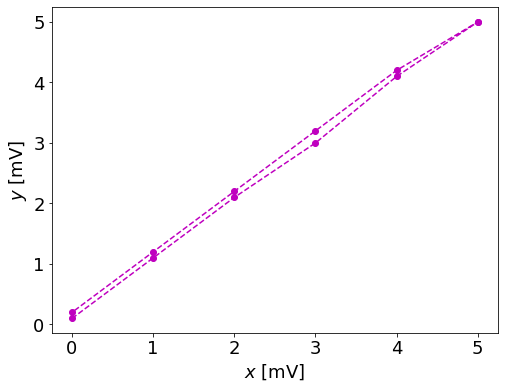

In [14]:
pl.plot(x,y,'--mo')
pl.xlabel('$x$ [mV]')
pl.ylabel('$y$ [mV]')

In [15]:
from IPython.display import Image
Image(url= "Desktop/InstrumentationLab1/hysterisis.png", width=400, height=400)

<b> <p>2. Estimate the hysterisis(%).</b> </p>

In [16]:
e_h = y[:6]-np.flipud(y[6:]) 
print ("e_h =", e_h,"[mV]")


e_h = [-0.1 -0.1 -0.1 -0.2 -0.1  0. ] [mV]


In [17]:
e_hmax = np.max(np.abs(e_h))
print ("e_hmax= %3.2f %s" % (e_hmax,"[mV]"))


e_hmax= 0.20 [mV]


In [14]:
e_hmax_p = 100*e_hmax/(np.max(y) - np.min(y))
print ("Relative error = %3.2f%s FSO" % (e_hmax_p,"%"))

NameError: name 'e_hmax' is not defined

### EXO C : Sensitivity

In [15]:
import numpy as np
import matplotlib.pyplot as pl
%pylab inline

import sys
from IPython.core.display import Image 

Populating the interactive namespace from numpy and matplotlib


In [16]:
import numpy as np
from scipy.stats import t

def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18
    tvalue = t.ppf(1-(1-0.95)/2, nu)

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, tvalue*Sa/np.sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, tvalue*Sb/np.sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Syx = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.3f V" % (a, b, tvalue*sxy/np.sqrt(N)))
    return a, b, RR, sxy

<b> <p>
1. Given the calibration data (x,y) plot the calibration curve.
2. Compute the sensitivty of the instrument for all the data and plot the corresponding sensitivity curve. </b> </p>

In [21]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

Text(0.5, 1.0, 'Calibration curve')

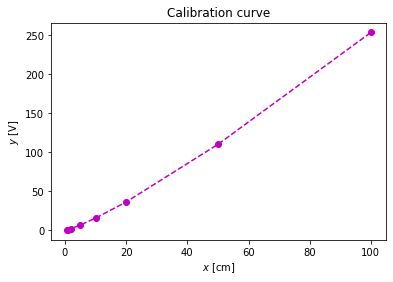

In [22]:
# Calibration curve
pl.plot(x,y,'--mo')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Calibration curve')

In [23]:
K = np.diff(y)/np.diff(x)
print (K)

[1.2        1.3        1.53333333 1.78       2.06       2.45666667
 2.862     ]


Text(0.5, 1.0, 'Sensitivity')

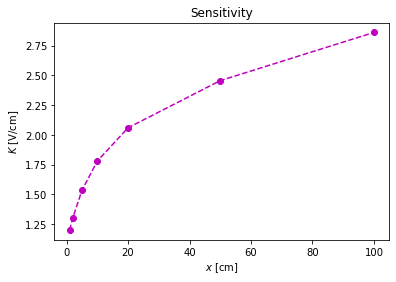

In [24]:
pl.plot(x[1:],K,'--mo')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Sensitivity')

<b> <p>
3. Take a logarithmic scale instead of a linear scale and plot the sensitivity curve again. what can you say about the data sensitivity ?
4. Compute and then plot the curve corresponding to the logarithmic sensitivity. </b> </p>

[1.32192809 1.20163386 1.19897785 1.19525629 1.20401389 1.20793568
 1.20146294]


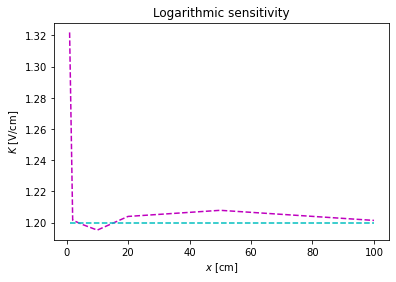

In [25]:
logK = np.diff(np.log10(y))/np.diff(np.log10(x))
print( logK)
pl.plot(x[1:],logK,'--m')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Logarithmic sensitivity')
pl.plot([x[1],x[-1]],[1.2,1.2],'c--')


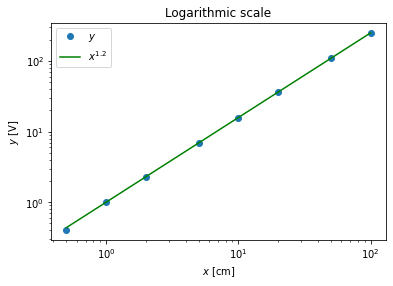

In [26]:
pl.loglog(x,y,'o',x,x**(1.2),'g')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Part II : Statistical analysis

### EXO A:  Why errors often look Gaussian ?

The central limit theorem (CLT) is the reason sums or averages of measurements appear to be well-described by a Gaussian distibution.

Suppose we have $N$ random variables $X_n$ from an distribution with finite variance.

The central limit theorem states that the sample mean $S_N$ approaches a Gaussian distribution with the same mean and variance as the measurements $X_N$.
That is, if the mean and variance of $X_n$ are given by $E[X_n] = \mu$ and $\mathrm{var}[X_n] = \sigma^2$, respectively, then the sample mean $S_N$ of $N$ measurements
$$S_N = \frac{1}{N} \sum_{n=1}^N X_n \rightarrow N(\mu, \sigma^2/N)$$
where $N(\mu, \sigma^2/N)$ denotes the normal (Gaussian) distribution with mean $\mu$ and variance $\sigma^2/N$:    
$$p(S_N | \mu, \sigma^2/N) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\left[-\frac{(S_N - \mu)^2}{2 \sigma^2/N}\right]$$

This also means that the variance of the sample mean $S_N$ shrinks as $N^{-1}$ as the sample size $N$ grows!

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


 <b> <p> 1. Implement the 'sample' function that computes 100000 random samples from a Gumbel distribution with a location of 1.5 and a scale of 3.0, and outputs a drawing of the mean of the computed samples.
</b> </p>

In [28]:
def sample(N, sample_size=100000):
    X_n = np.random.gumbel(1.5, 3.0, [sample_size, N])
    MeanX_n = X_n[:,:].mean(axis=1)
    return X_n, MeanX_n


[[2.8551832 ]
 [2.48424605]
 [7.97683788]
 ...
 [5.95440648]
 [6.04902911]
 [6.51812648]]


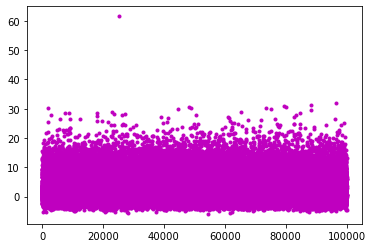

In [29]:
X_n , MeanX_n= sample(1)
plt.figure()
plt.plot(MeanX_n,'.m')
print(X_n)

<b> <p> 2. Given the function 'show_gaussian_fit', plot the distribution of X_n and its Gaussian fit for comparison. </b> </p>


In [30]:
def show_gaussian_fit(sample, bins):
    mu = sample.mean()
    sigma = sample.std()
    bin_size=   (bins[1] - bins[0])
    a = sample.size * bin_size
    
    fig,ax = plt.subplots()
    ax.hist(sample, bins);
    # show_gaussian_fit(S_N, bins);
    ax.plot(bins, a/ (np.sqrt(2*np.pi)*sigma) * np.exp(-(bins-mu)**2 / (2*sigma**2)), 'm-')
    ax.get_yaxis().set_ticks([]); # turn off y ticks
    # Label plot.
    ax.set_xlabel('x');
    ax.set_ylabel('p(x)');


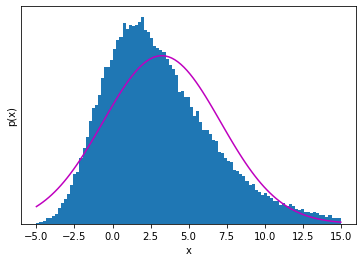

In [31]:
bins = np.linspace(-5, 15, 100);
show_gaussian_fit(MeanX_n, bins);

In [32]:
   
from scipy.stats import norm
def show_gaussian_fit(sample, bins):
    
    mean,std=norm.fit(sample)
    plt.hist(sample, bins, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y)
    plt.show()

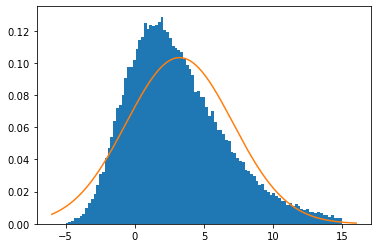

In [33]:
bins = np.linspace(-5, 15, 100);
show_gaussian_fit(MeanX_n, bins);

<b> <p>
    
3. Repeat the same for a samples of 3 , 10 and 100.
    
4. What can you say about the data distribution ?

</b> </p>

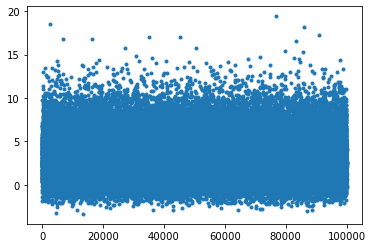

In [34]:
S_n, MeanS_n = sample(3)

plt.figure()
plt.plot(MeanS_n,'.')



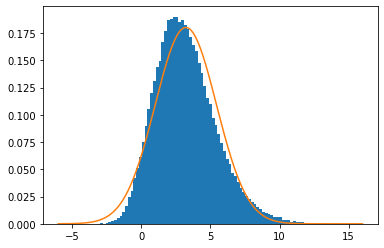

In [35]:
show_gaussian_fit(MeanS_n, bins);

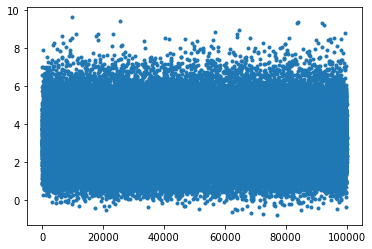

In [36]:
S_n, MeanS_n = sample(10)

plt.figure()
plt.plot(MeanS_n,'.')



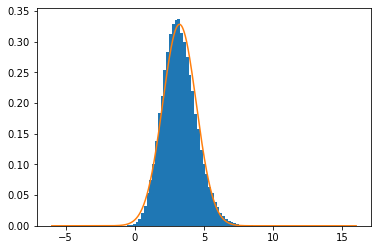

In [37]:
show_gaussian_fit(MeanS_n, bins);

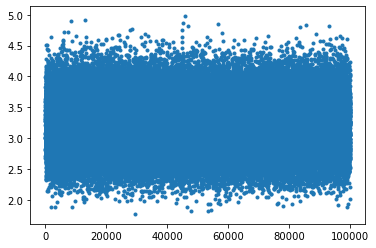

In [38]:
S_n, MeanS_n = sample(100)

plt.figure()
plt.plot(MeanS_n,'.')


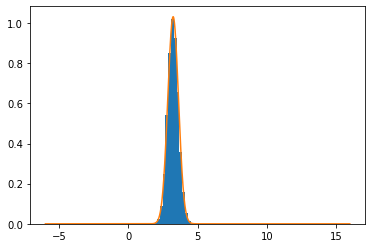

In [39]:
show_gaussian_fit(MeanS_n, bins);

### Conclusion :

This is almost Gaussian!

The most amazing thing is that this works for any random variable $X_n$ as long as its variance is finite---it can be extremely non-Gaussian and it will still eventually look Gaussian!

The take-away message is this: If there is some summing or averaging of independent, identically distributed data in your measurement, that new variable will likely be well-described by a Gaussian model.

    

## Part II : Create your toolbox for the frequency analysis

### Exo A : Signal construction

In [4]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
from pylab import plot, show, title, xlabel, ylabel, subplot

<b> <p>1. create a secret periodic signal with an offset 'oft', a magnitude 'a1' and a fundamental frequency 'f1'
    
    fs and N  being the sampling frequency and the number of samples respectively.
</b> </p>

In [5]:
def descrete_signal(fs,N, f1, a1, oft):
    """ create a secret periodic signal """
    dt = 1./fs
    t = np.linspace(0,N*dt,N)
    y = oft+a1*np.sin(2*np.pi*f1*t) # this is a secret function 
    return t, y

Text(0, 0.5, 'y(t)')

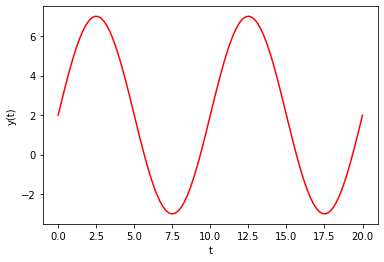

In [6]:
f1 = 10
a1 = 5.0
oft = 2
fs = 5
N = 100

t,y = descrete_signal(fs,N, f1, a1, oft)

plot(t,y,'r')
xlabel('t')
ylabel('y(t)')

<b> <p>2. create a function that adds normalized and centred Gaussian noise on top of the signal y.</b> </p>

In [7]:
def noisy_signal(y_noise,N):
    """ Adds normalized and centred Gaussian noise on top of the descrete signal"""
    noise = np.random.normal(0,1,N)
    y_noise += noise
    return t, y_noise

Text(0, 0.5, 'y_noise(t)')

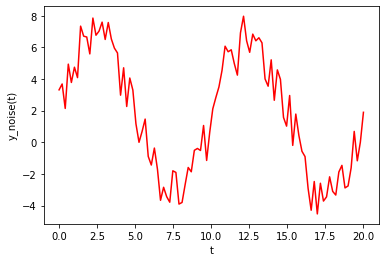

In [8]:
t,y_noise = noisy_signal(y,N)

plot(t,y_noise,'r')
xlabel('t')
ylabel('y_noise(t)')

<b> <p>3. create a function that computes the spectrum of a sampled signal y with a sampling frequency fs.</b> </p>

In [12]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return frq, Y



<b> <p>4. create a function that plots the spectrum of a sampled signal y with a sampling frequency fs.</b> </p>

In [13]:
def plotspectrum(y,Fs):
    frq, Y = spectrum(y,Fs)
    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')



<b> <p> Let's take back our toy example ! 
    
    5. For a sampling frequency of 150 Hz, a fundamental frequency of 5 Hz, plot the spectrum of the noisy sigal and the original sinoisidal signal ( one componenent). 

</b> </p>

/tmp/ipykernel_16841/1930356759.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frq = frq[range(np.int(n/2))] # one side frequency range
/tmp/ipykernel_16841/1930356759.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
D

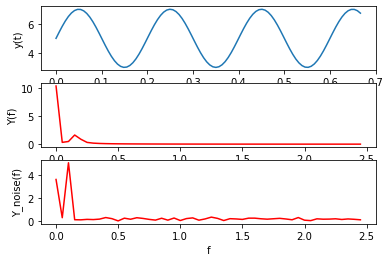

In [14]:

t,y = descrete_signal(fs=150,N=100, f1=5, a1=2.0, oft=5.0)

subplot(3,1,1)
plot(t,y)
xlabel('t')
ylabel('y(t)')

subplot(3,1,2)
plotspectrum(y,fs)
xlabel('f')
ylabel('Y(f)')

subplot(3,1,3)
plotspectrum(y_noise,fs)
xlabel('f')
ylabel('Y_noise(f)')
show()


<b> <p>5. create a function that plots the time signal y(t) and the spectrum Y(f) after removing the DC component. </b> </p>

In [48]:
def plotSignal(t,y,fs):
    """ plots the time signal y(t) and the 
    frequency spectrum Y(fs), after removing
    the DC component. 
    Inputs:
        t - time signal, [sec]
        y - values, [Volt]
        fs - sampling frequency, [Hz]
    Outputs:
        plot with two subplots: y(t) and the spectrum Y(f) 
    """
    y = y - y.mean()
    frq,Y = spectrum(y,fs) 
    
    # Plot
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t,y,'b-')
    plt.xlabel('$t$ [s]')
    plt.ylabel('$Y$ [V]')
    # axes().set_aspect(0.2)
    # title('sampled signal')
    plt.subplot(2,1,2)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('$f$ (Hz)')
    plt.ylabel('$|Y(f)|$')    

C:\Users\nisam\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]


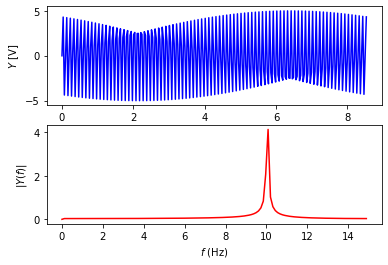

In [49]:
fs,N, f1, a1, oft = 30, 256, 10, 5.0, 2
t,y = descrete_signal(fs,N, f1, a1, oft)
plotSignal(t,y,fs)

<b> <p>6. Implement the sampling, quantization and clipping function as described in the comments. </b> </p>

In [50]:
def sampling(t,y,fs):
    """ sampling of a signal y(t) at frequency fs [Hz]
    inputs:
        t  - time signal [s], array of floats, dense sampled
        y  - signal [Volt], array of floats
        fs  - sampling frequency [Hz], float
    """
    dt = 1./fs
    ts = np.arange(t[0],t[-1],dt)
    #ts = np.linspace(t[0],t[-1],np.round((t[-1]-t[0])/dt))
    ys = np.interp(ts,t,y,left=0.0,right=0.0)
    return ts,ys

In [51]:
def quantization(ys,N):
    """quantization of a signal
    inputs:
        ts - time signal [s], array
        ys - signal [Volt], array
        N  - number of bits, scalar (2,4,8,12,...)
    outputs:
        yq - digitized signal at N bits
    """
        #quantization
    N = 4 # number of bits
    max_value = 2**(N-1) - 1
    yq = (ys*(max_value)).astype(np.int32)/(max_value)
    return yq

In [24]:
def clipping(y,miny=-5,maxy=5):
    """ clipping of signal 
    inputs: 
        y - signal [V] array of floats
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
    outputs:
        y - clipped signal [V]
    """
    y[y < miny] = miny
    y[y > maxy] = maxy
    return y

[ 3.31251527e+00  3.68366579e+00  2.13836623e+00  4.93815352e+00
  3.78018228e+00  4.74455584e+00  4.08665977e+00  7.34036055e+00
  6.70627604e+00  6.65369062e+00  5.58535139e+00  7.85133243e+00
  6.76678325e+00  7.02532621e+00  7.59297378e+00  6.49917475e+00
  7.56893148e+00  6.52970875e+00  5.95028512e+00  5.64510066e+00
  2.97709350e+00  4.70742108e+00  2.26146412e+00  4.06078053e+00
  3.29911667e+00  1.16893746e+00 -3.26295244e-03  6.81437441e-01
  1.46416820e+00 -8.93289621e-01 -1.43992838e+00 -3.67446759e-01
 -1.70340051e+00 -3.66853918e+00 -2.84653732e+00 -3.43939804e+00
 -3.78945339e+00 -1.80370565e+00 -1.90653478e+00 -3.90875977e+00
 -3.80592918e+00 -2.68163572e+00 -1.59518297e+00 -1.86622221e+00
 -5.09782661e-01 -3.92637734e-01 -5.20220283e-01  1.05936926e+00
 -1.14960378e+00  6.28886762e-01  2.11459530e+00  2.83123301e+00
  3.49833271e+00  4.53967323e+00  6.07235738e+00  5.72200156e+00
  5.84541841e+00  4.97086346e+00  4.24434252e+00  6.91397000e+00
  7.96631915e+00  6.41608

<b> <p>7. Implement the sample and hold reconstruction as described in the comments. </b> </p>

In [53]:
def sample_hold_reconstruction(t, ts, yq, method=None):
    """ sampling and holding 
    inputs: 
        yq - digitized signal at N bits
        ts - time signal [s], array
        t  - time signal [s], array of floats, dense sampled

    outputs:
        yr - reconstructed signal
    """
    # sample and hold reconstruction
    if method is 'soh':
        tr = t
        soh = interp1d(ts, yq, kind='zero', bounds_error=False,fill_value=yq[-1])
        yr = soh(tr)
    elif method is 'zoh':
        tr = t
        yr = np.zeros_like(tr)
        index = np.abs(np.subtract.outer(tr, ts)).argmin(0)
        yr[index] = yq
    elif method is None:
        tr = ts
        yr = yq
    else:
        raise(ValueError)
    return tr, yr

<b> <p>8. Implement the adc using the function of your selfcreated toolbox as described in the comments. </b> </p>

In [54]:
# sample and hold
from scipy.interpolate import interp1d

def adc(t,y,fs=1.,N=4,miny=-5.,maxy=5.,method=None):
    """ A/D conversion
    Inputs:
        t - time [s] array of floats,
        y - signal [V] array of floats,
        fs - sampling frequency [Hz], scalar float,
        N - number of bits of the A/D converter, (2,4,8,12,14,...)
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
        method - the reconstruction method: 'zoh' = zero-and-hold, 'soh' - sample and hold or None
    outputs:
        ts - sampled times [s]
        yq - sampled and digitized signal [V]
        yr - reconstructed, sample-and-hold signal [V]

    """
    # first sample
    ts,ys = sampling(t,y,fs)
    # clipping
    ys = clipping(ys,miny,maxy)
    # digitize
    yq = quantization(ys,N)
    # reconstruct
    tr,yr = sample_hold_reconstruction(t, ts, yq, method='soh')
        
    return ts,yq,tr,yr

<b> <p>9. Test and conclude. </b> </p>

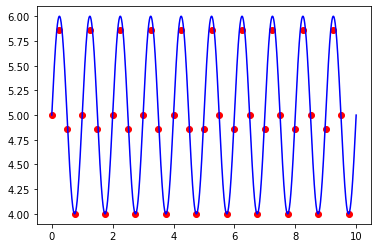

In [55]:
# example 1:

t = np.linspace(0,10, 10000)
y = 5+np.sin(2*np.pi*1*t)
ts,yq,tr,yr = adc(t,y,fs=4,N=14,miny=0,maxy=10) # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(t, y,'b-')

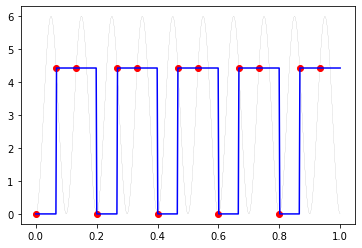

In [56]:
# example 2
t = np.linspace(0,1.,500)
y = 3+3*np.sin(2*np.pi*10*t-np.pi/2.)

ts,yq,tr,yr = adc(t,y,fs=15,N=12,miny=0,maxy=10,method='soh') # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')

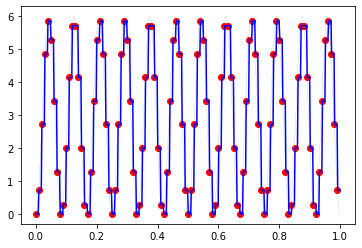

In [57]:
# example 2
t = np.linspace(0,1.,500)
y = 3+3*np.sin(2*np.pi*12*t-np.pi/2.)

ts,yq,tr,yr = adc(t,y,fs=100,N=12,miny=0,maxy=10,method='soh') # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')

#### N.B : The jupyter notebook is to be sent via claco.

##### Lecturers

Tahani Madmad : mdm@ecam.be

<span>

Nicolas Marchand : mch@ecam.be